# Ultimate Technologies Challenge

## Part 1 ‐ exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import json
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
# import json file
data = pd.read_json('logins.json')
login = data.copy()

In [3]:
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
login.shape

(93142, 1)

In [5]:
login.set_index('login_time', inplace=True)
login['count'] = 1 # create new column with counter

login.resample('15T').sum() # count in 15 minute intervals

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [6]:
minute_int = login.resample('15T').sum()
minute_int.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [7]:
minute_int = minute_int.reset_index()
minute_int.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


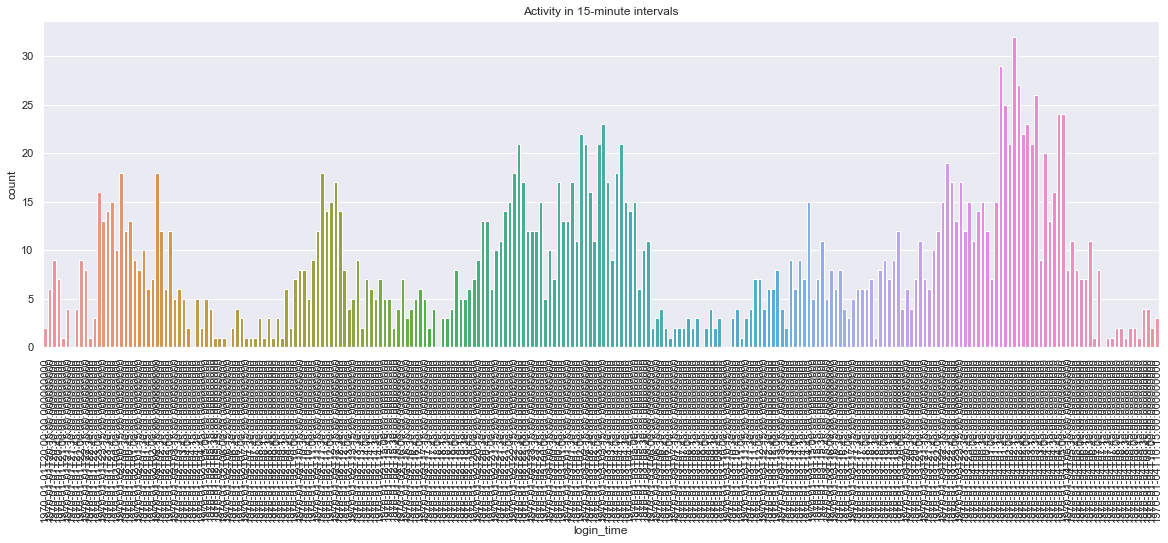

In [8]:
# plot timestamp for first 250 timestamps
plt.figure(figsize=(20, 6))
p = sns.barplot(x='login_time', y='count', data=minute_int.iloc[:250])
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.title('Activity in 15-minute intervals')
plt.show()

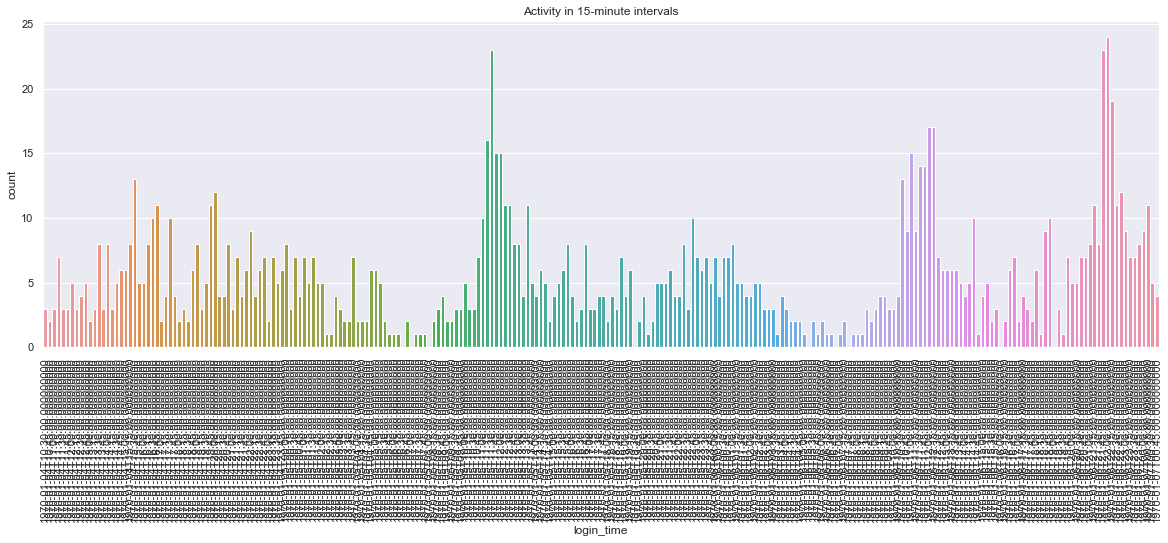

In [9]:
# plot timestamp for the next 250 timestamps
plt.figure(figsize=(20, 6))
p = sns.barplot(x='login_time', y='count', data=minute_int.iloc[250:500])
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.title('Activity in 15-minute intervals')
plt.show()

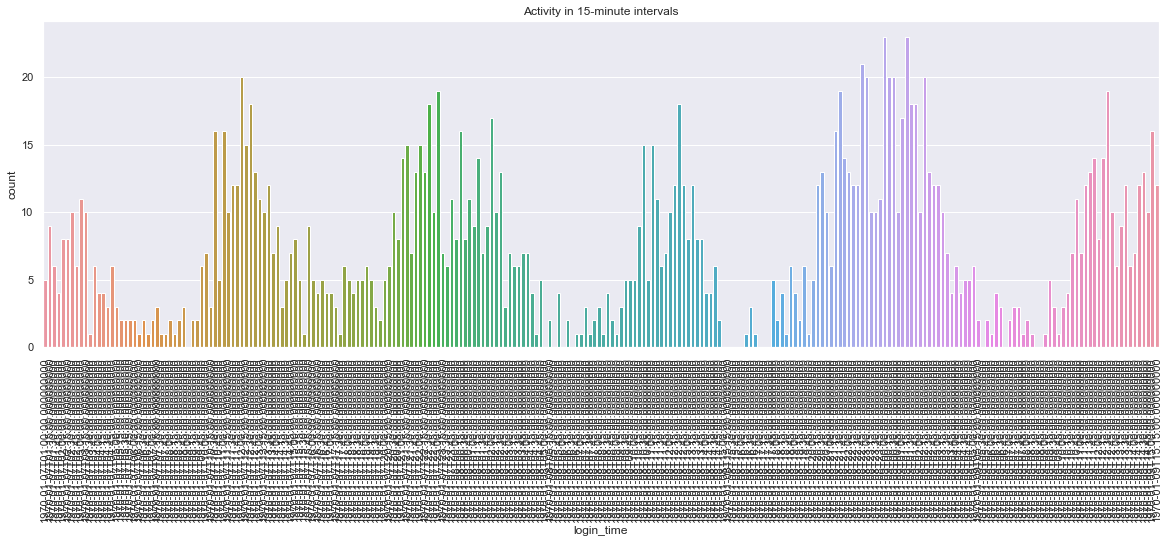

In [10]:
# plot for the next 250 timestamps
plt.figure(figsize=(20, 6))
p = sns.barplot(x='login_time', y='count', data=minute_int.iloc[500:750])
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.title('Activity in 15-minute intervals')
plt.show()

After separating the timestamps into 15 minute intervals and counting how many there are per interval, the next part is to create bar plots of each day. We start by defining a function that locates the indexes of the range of times for one day. After returning the locations on the dataset, the next function graphs the data. Since there are a lot of timestamps for each day, we are only plotting one day at a time for visualization clarity.

In [11]:
# define a function that returns the locations of the date entered
def time_frame(year, month, day):
    indexes = []
    for x in range(len(minute_int)):
        dates = ((minute_int['login_time'].iloc[x].year == year) & (minute_int['login_time'].iloc[x].month == month) & (minute_int['login_time'].iloc[x].day == day))
        if dates == True:
            indexes.append(minute_int.iloc[x].name) # locations of dates
    return indexes[0], indexes[-1] + 1 # returns the coordinates

In [12]:
# define a function that plots the traffic for a specific date
def sns_plot(year, month, day):
    x, y = time_frame(year, month, day)
    plt.figure(figsize=(20, 6))
    p = sns.barplot(x='login_time', y='count', data=minute_int.iloc[x:y])
    p.set_xticklabels(p.get_xticklabels(), rotation=90)
    plt.title('Traffic in 15 minute intervals')
    plt.show()

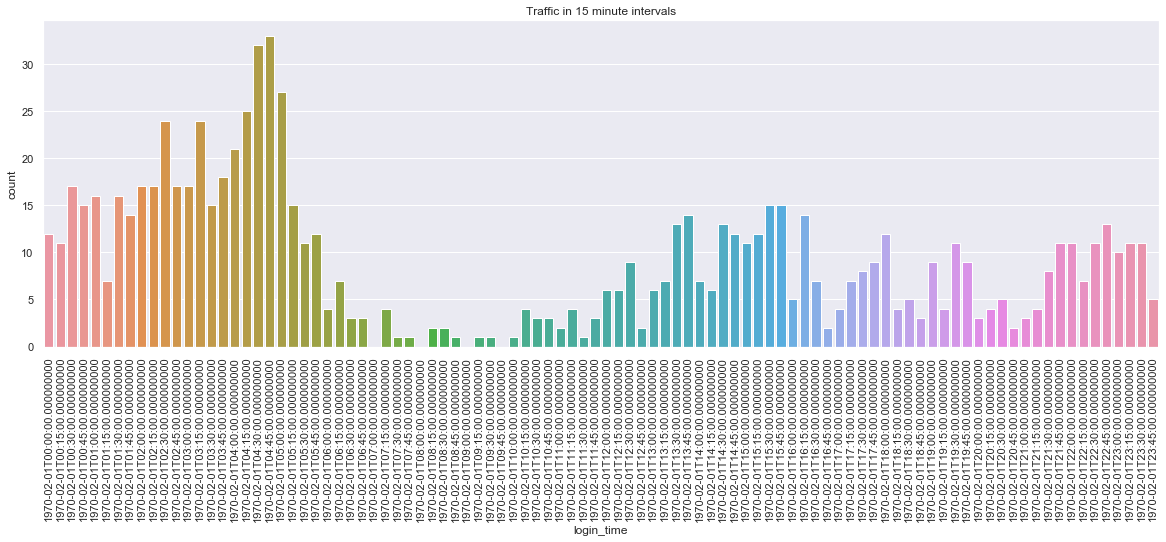

In [13]:
sns_plot(1970, 2, 1)

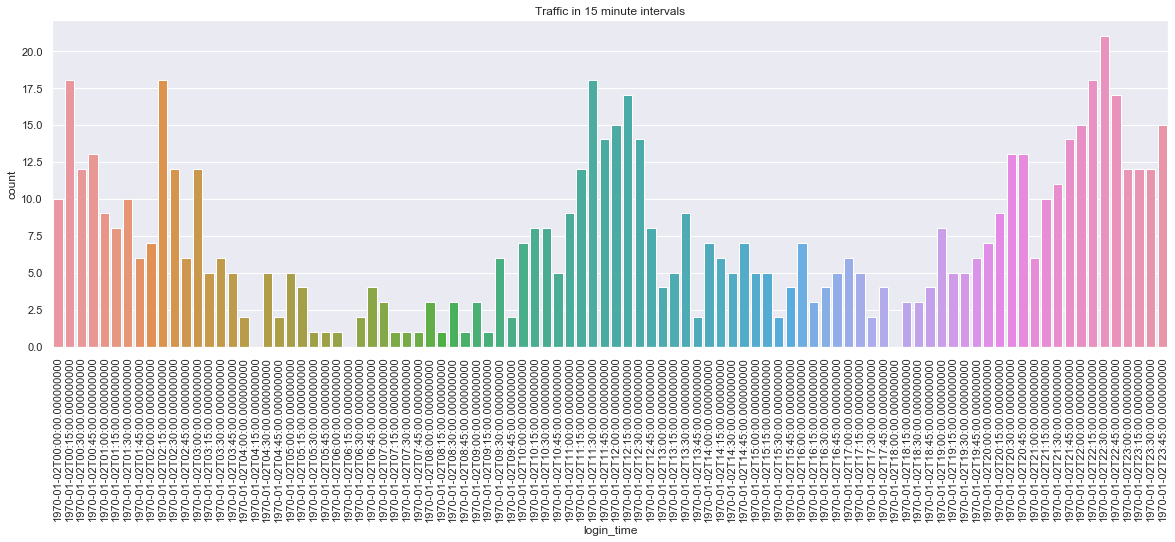

In [14]:
sns_plot(1970, 1, 2)

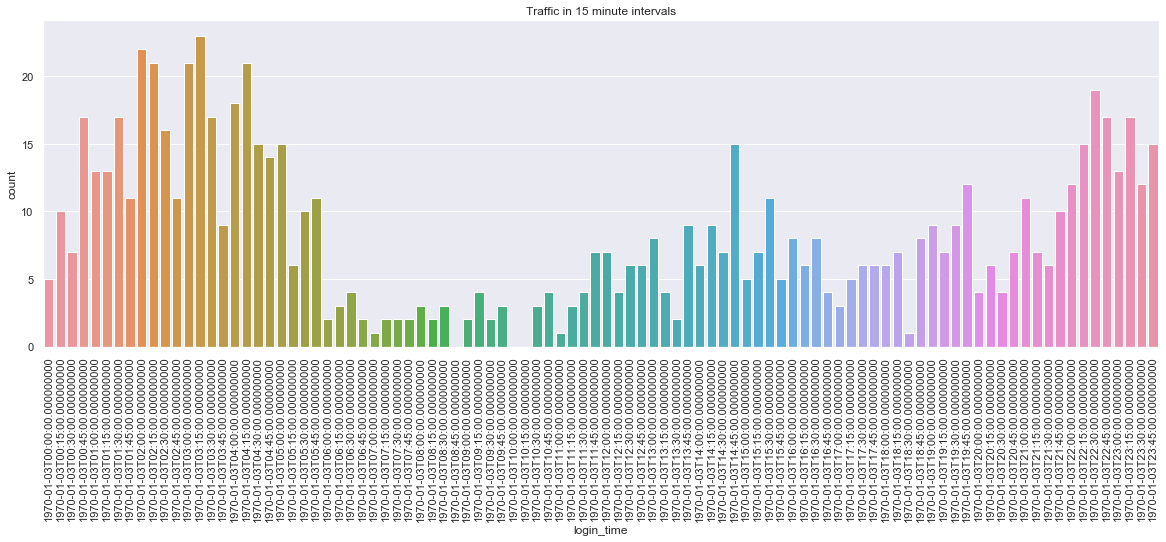

In [15]:
sns_plot(1970, 1, 3)

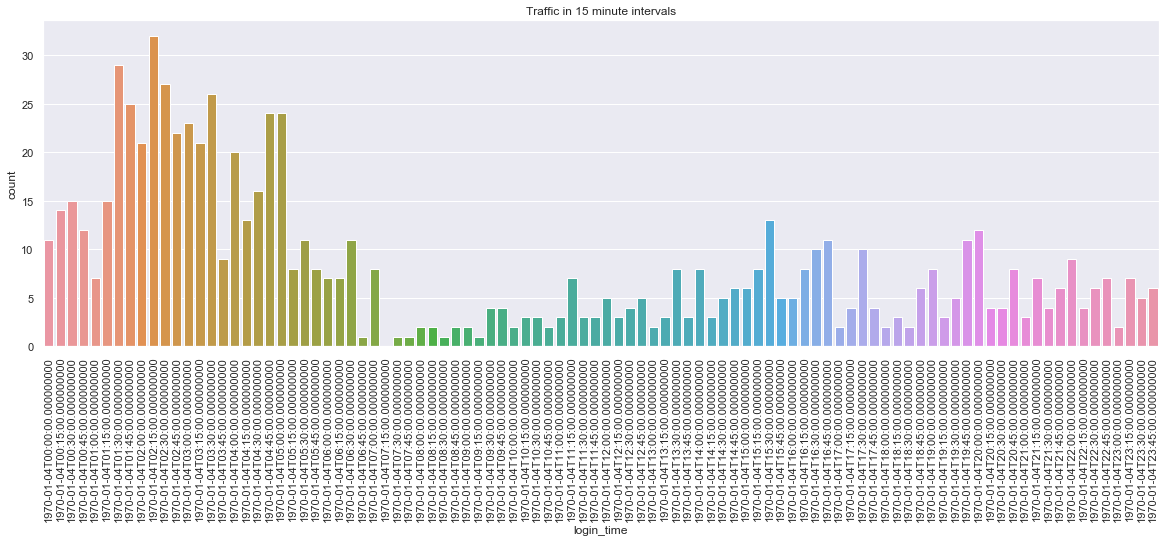

In [16]:
sns_plot(1970, 1, 4)

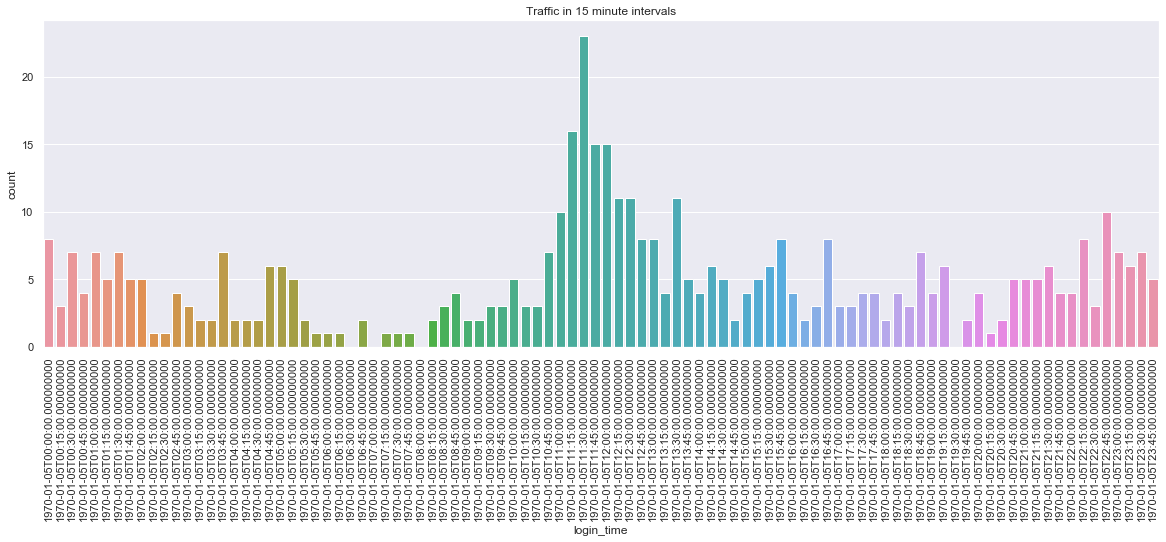

In [17]:
sns_plot(1970, 1, 5)

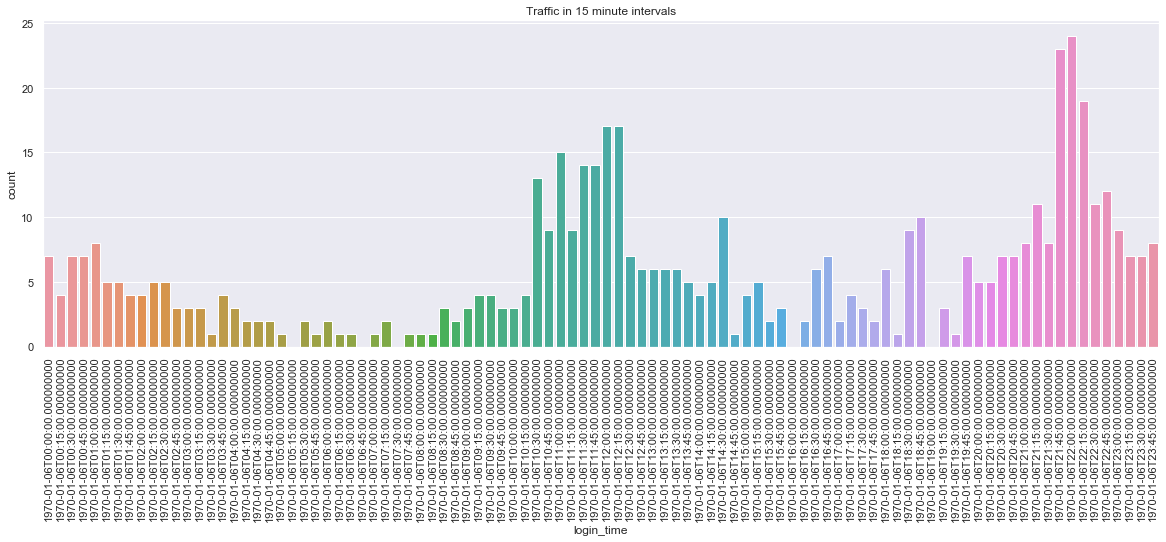

In [18]:
sns_plot(1970, 1, 6)

## Part 2 ‐ experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    1. how you will implement the experiment
    2. what statistical test(s) you will conduct to verify the significance of the observation
    3. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

**Response:**

If toll booth revenue increases on both sides, then that means driver partners are using the bridge instead of staying exclusive to one area. Specifically, we need to measure the reimbursement claims from these toll booths since only driver partners have this privilege. If they are using the toll booth, then we know they are most likely looking for clients in the other city.

## Part 3 ‐ predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were "active" (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

In [19]:
# import json file
data_challenge = json.load((open('ultimate_data_challenge.json')))
data_challenge = pd.DataFrame(data_challenge) # convert to DataFrame

rider = data_challenge.copy()

In [20]:
rider.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [21]:
rider.shape

(50000, 12)

In [22]:
# basic statistics
round(rider.describe(), 2)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.00,41878.00,50000.00,50000.00,50000.00,50000.00,49799.00
mean,2.28,4.60,1.07,8.85,60.93,5.80,4.78
std,3.79,0.62,0.22,19.96,37.08,5.71,0.45
min,0.00,1.00,1.00,0.00,0.00,0.00,1.00
25%,0.00,4.30,1.00,0.00,33.30,2.42,4.70
50%,1.00,4.90,1.00,0.00,66.70,3.88,5.00
75%,3.00,5.00,1.05,8.60,100.00,6.94,5.00
max,125.00,5.00,8.00,100.00,100.00,160.96,5.00


In [23]:
# check for NaN
rider.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64